Md Nafisul Hasan Sami

DS 311

# Recreate
A line graph that shows gender wage trends in art professions (2014-2022)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
csv_file_path = 'Data/Recreate.csv'
df = pd.read_csv(csv_file_path)
print(df.head())
print(df.info())  # Check data types

   ID Year  Year  ID Gender  Gender  ID Workforce Status  Workforce Status  \
0     2022  2022          1    Male                 True              True   
1     2022  2022          2  Female                 True              True   
2     2021  2021          1    Male                 True              True   
3     2021  2021          2  Female                 True              True   
4     2020  2020          1    Male                 True              True   

  ID Nation         Nation  ID Detailed Occupation        Detailed Occupation  \
0   01000US  United States                  271010  Artists & related workers   
1   01000US  United States                  271010  Artists & related workers   
2   01000US  United States                  271010  Artists & related workers   
3   01000US  United States                  271010  Artists & related workers   
4   01000US  United States                  271010  Artists & related workers   

   Average Wage  Average Wage Appx MOE  
0  

In [3]:
# Add dollar sign before the amount of wage
df['Average Wage'] = df['Average Wage'].apply(lambda x: f'${x:,.2f}')
print(df.head())

   ID Year  Year  ID Gender  Gender  ID Workforce Status  Workforce Status  \
0     2022  2022          1    Male                 True              True   
1     2022  2022          2  Female                 True              True   
2     2021  2021          1    Male                 True              True   
3     2021  2021          2  Female                 True              True   
4     2020  2020          1    Male                 True              True   

  ID Nation         Nation  ID Detailed Occupation        Detailed Occupation  \
0   01000US  United States                  271010  Artists & related workers   
1   01000US  United States                  271010  Artists & related workers   
2   01000US  United States                  271010  Artists & related workers   
3   01000US  United States                  271010  Artists & related workers   
4   01000US  United States                  271010  Artists & related workers   

  Average Wage  Average Wage Appx MOE  
0   

<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hy/hnmjt1t55xj2lz4jp45jcw680000gn/T/ipykernel_58491/2272969075.py:38: SyntaxWarning: invalid escape sequence '\$'
  male_data['Average Wage'] = male_data['Average Wage'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/hy/hnmjt1t55xj2lz4jp45jcw680000gn/T/ipykernel_58491/2272969075.py:39: SyntaxWarning: invalid escape sequence '\$'
  female_data['Average Wage'] = female_data['Average Wage'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/hy/hnmjt1t55xj2lz4jp45jcw680000gn/T/ipykernel_58491/2272969075.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

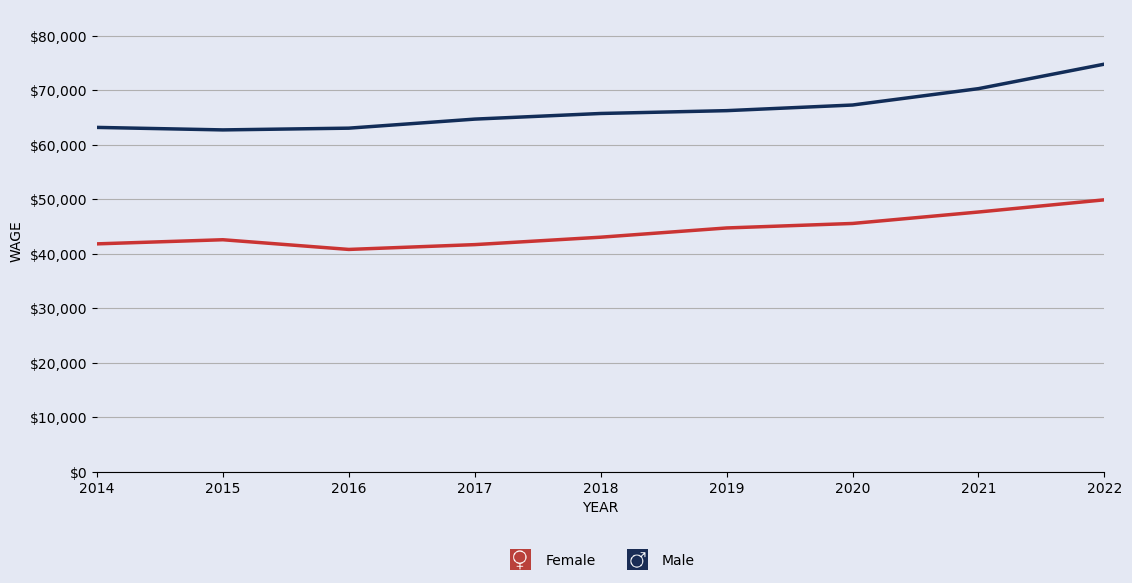

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerBase
from PIL import Image

bg_gray = '#E4E8F3'

# Function to format y-axis labels with a dollar sign
def currency(x, pos):
    return f'${x:,.0f}'

# Load PNG images
male_icon = Image.open("MaleLegend.png").resize((30, 30))  # Resize for better fitting
female_icon = Image.open("FemaleLegend.png").resize((30, 30))

# Convert images to NumPy arrays
male_icon_array = np.array(male_icon)
female_icon_array = np.array(female_icon)

# Custom Legend Handler to Display Images
class ImageHandler(HandlerBase):
    def __init__(self, image_array):
        self.image_array = image_array
        super().__init__()

    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        img = OffsetImage(self.image_array, zoom=0.5)  # Adjust zoom to fit well
        ab = AnnotationBbox(img, (width / 2, height / 2), frameon=False, xycoords=trans)
        return [ab]

# Filter data by gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Convert 'Average Wage' to float for plotting
male_data['Average Wage'] = male_data['Average Wage'].replace('[\$,]', '', regex=True).astype(float)
female_data['Average Wage'] = female_data['Average Wage'].replace('[\$,]', '', regex=True).astype(float)

# Define yUpper for y-axis limit
yUpper = max(male_data['Average Wage'].max(), female_data['Average Wage'].max()) + 10000

# Plot the data
plt.figure(figsize=(13, 6))
plt.plot(male_data['Year'], male_data['Average Wage'], label='Male', color='#122D58', linewidth=2.5)
plt.plot(female_data['Year'], female_data['Average Wage'], label='Female', color='#CA3433', linewidth=2.5)

# Add labels and grid
plt.xlabel('YEAR')
plt.ylabel('WAGE')
plt.grid(True)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Set background color
plt.gcf().set_facecolor(bg_gray)
plt.gca().set_facecolor(bg_gray)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

# Set y-axis range and ticks
plt.ylim(0, yUpper)
plt.yticks(np.arange(0, yUpper, 10000))

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Custom Legend with Icons
handles, labels = plt.gca().get_legend_handles_labels()
male_patch = plt.Line2D([], [], color='w', label="Male")
female_patch = plt.Line2D([], [], color='w', label="Female")

legend = plt.legend(
    handles=[female_patch, male_patch], 
    labels=["Female", "Male"], 
    loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False,
    handler_map={female_patch: ImageHandler(female_icon_array), male_patch: ImageHandler(male_icon_array)}
)

# Set x-axis range and ticks
plt.xlim(male_data['Year'].min(), male_data['Year'].max())
plt.xticks(male_data['Year'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Adjust vertical grid lines

# Save the plot as a PDF

plt.savefig('gender_wage_trends.pdf', bbox_inches = 'tight')

plt.show()


I was able to accurately recreate most aspects of the visualization, including colors, labels, gridlines, and legends. However, I couldn't find the exact font used in the original graph, despite trying multiple options. Other than that, I believe my recreation closely matches the original.

# Remix
I want to remix this into a bar graph.

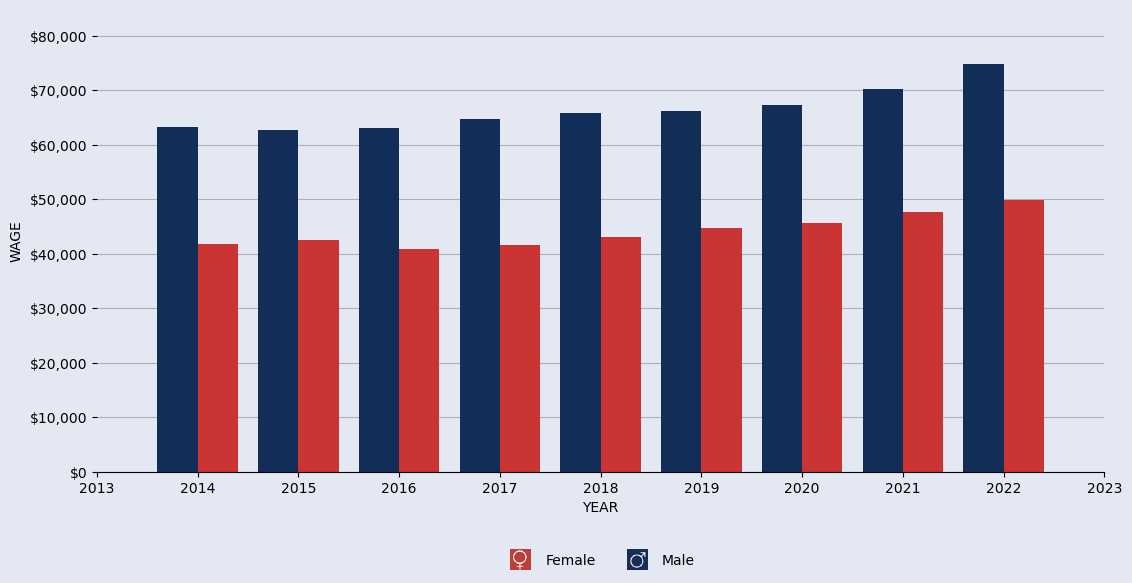

In [5]:
# Plot the data as a bar graph
plt.figure(figsize=(13, 6))

# Plot male data
plt.bar(male_data['Year'] - 0.2, male_data['Average Wage'], width=0.4, label='Male', color='#122D58')

# Plot female data
plt.bar(female_data['Year'] + 0.2, female_data['Average Wage'], width=0.4, label='Female', color='#CA3433')

# Add labels and grid
plt.xlabel('YEAR')
plt.ylabel('WAGE')
plt.grid(True)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Set background color
plt.gcf().set_facecolor(bg_gray)
plt.gca().set_facecolor(bg_gray)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

# Set y-axis range and ticks
plt.ylim(0, yUpper)
plt.yticks(np.arange(0, yUpper, 10000))

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Custom Legend with Icons
handles, labels = plt.gca().get_legend_handles_labels()
male_patch = plt.Line2D([], [], color='w', label="Male")
female_patch = plt.Line2D([], [], color='w', label="Female")

legend = plt.legend(
    handles=[female_patch, male_patch], 
    labels=["Female", "Male"], 
    loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False,
    handler_map={female_patch: ImageHandler(female_icon_array), male_patch: ImageHandler(male_icon_array)}
)

# Set x-axis range and ticks
plt.xlim(male_data['Year'].min() - 1, male_data['Year'].max() + 1)
plt.xticks(male_data['Year'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Adjust vertical grid lines

# Save the plot as a PDF
#plt.savefig('gender_wage_trends_bar.pdf', format='pdf')
plt.savefig('gender_wage_trends_bar.pdf', bbox_inches = 'tight')
# Set zorder for bars and grid lines
plt.gca().set_axisbelow(True)

plt.show()

My remix uses the same data but presents it as a grouped bar graph instead of a line graph. While it doesn't introduce an entirely new aspect of the visualization, it makes the wage gap more visually distinct by displaying male and female wages side by side for each year. This adjustment improves clarity, making it easier for the audience to compare values at a glance. I kept the original colors, legends, and background to maintain consistency while enhancing readability and interpretation.